In [1]:
#Import Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Import Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\david\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
#Import seaborn (must conda install first)

import seaborn as sns

In [3]:
#Filter data

df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

In [4]:
#Explode job skills

df_DA_US = df_DA_US.explode('job_skills')

#Aggregate salaries by skill

df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

#Create dataframe for top 10 skills by median salary

df_DA_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)

#Create dataframe for top 10 skills by frequency

df_DA_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

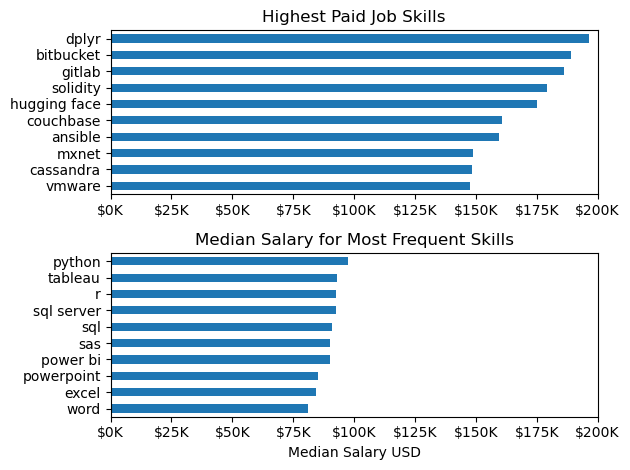

In [5]:
#Plots from previous lesson

fig, ax = plt.subplots(2, 1)

df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].invert_yaxis()
ax[0].set_xlim(0, 200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Job Skills')
df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].invert_yaxis()
ax[1].set_xlim(0, 200000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_title('Median Salary for Most Frequent Skills')

fig.tight_layout()
plt.show()

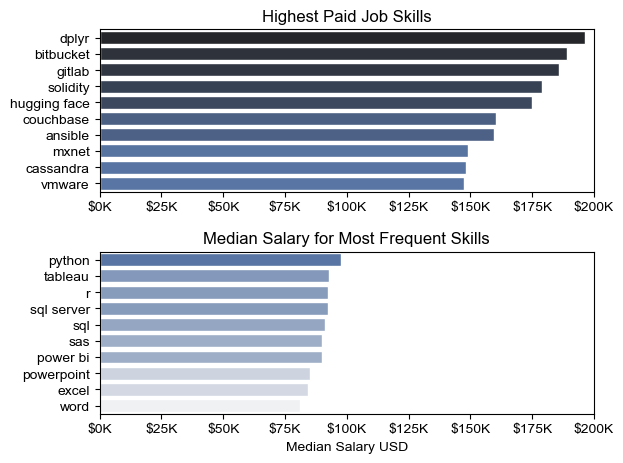

In [14]:
#Modifications with seaborn

fig, ax = plt.subplots(2, 1)

sns.set_theme(style = 'ticks')

sns.barplot(data = df_DA_top_pay, x = 'median', y = df_DA_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
#df_DA_top_pay.plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
#ax[0].invert_yaxis()
ax[0].set_xlim(0, 200000)
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].set_title('Highest Paid Job Skills')
ax[0].legend().remove()

sns.barplot(data = df_DA_skills, x = 'median', y = df_DA_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
#df_DA_skills.plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
#ax[1].invert_yaxis()
ax[1].set_xlim(0, 200000)
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
ax[1].set_xlabel('Median Salary USD')
ax[1].set_ylabel('')
ax[1].set_title('Median Salary for Most Frequent Skills')
ax[1].legend().remove()

fig.tight_layout()
plt.show()

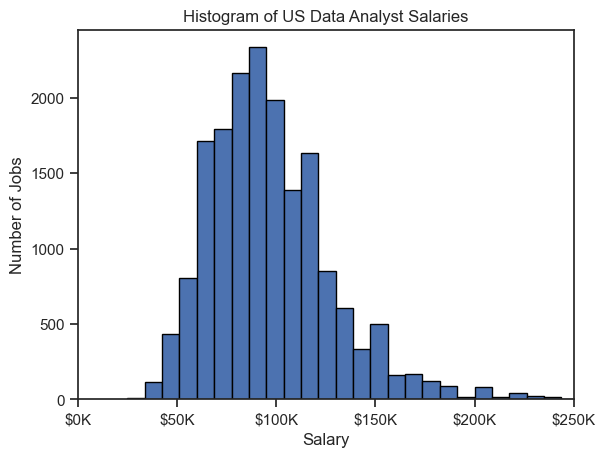

In [16]:
#Histogram of salary from prior lesson

df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)
plt.title('Histogram of US Data Analyst Salaries')
plt.xlabel('Salary')
plt.ylabel('Number of Jobs')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show()

In [20]:
import numpy as np

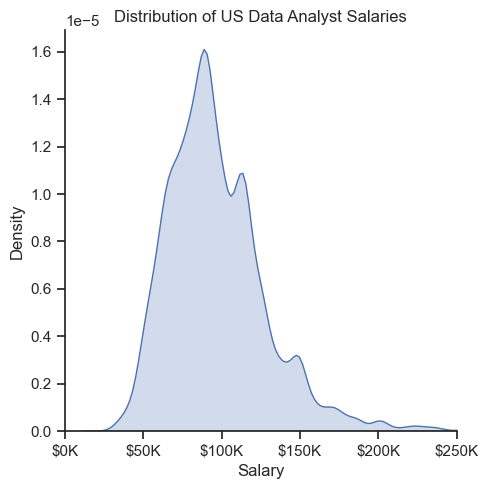

In [24]:
#Modifications with seaborn

sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = True)
#df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)
plt.title('Distribution of US Data Analyst Salaries')
plt.xlabel('Salary')
plt.ylabel('Density')

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

plt.show()

In [25]:
#Plot by specific job titles

job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

#Filter data

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset = ['salary_year_avg'])

#Create list of salaries for each job title

job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

C:\Users\david\AppData\Local\Temp\ipykernel_3836\2818112378.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


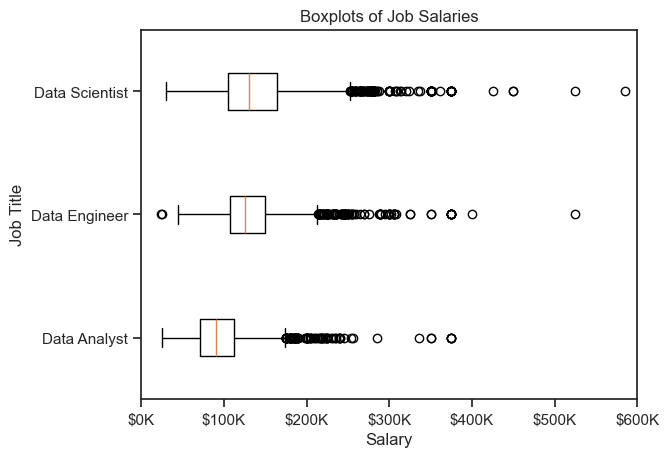

In [26]:
#Boxplot from prior lesson

plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Boxplots of Job Salaries')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()

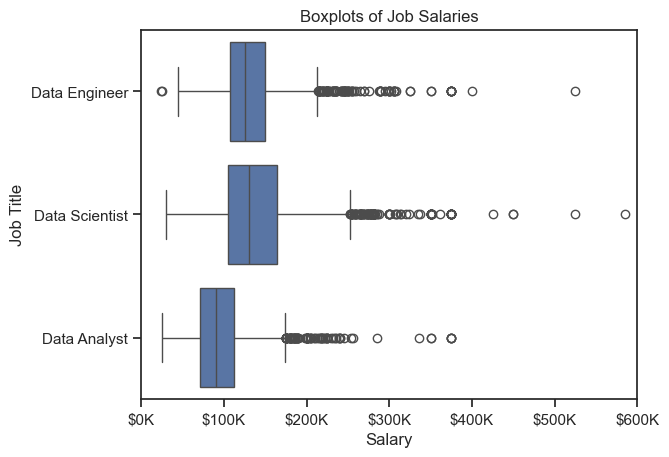

In [27]:
#Modifications with seaborn

sns.boxplot(data = df_US, x  ='salary_year_avg', y = 'job_title_short')
#plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Boxplots of Job Salaries')
plt.xlabel('Salary')
plt.ylabel('Job Title')
plt.xlim(0, 600000)
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))
plt.show()